# Modular Neural Network

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np 
import pandas as pd
import ipywidgets as widgets
import sys
import matplotlib.pyplot as plt
import cv2 ## Importing openCV here
import tensorflow as tf ## importing love and life
import os
import matplotlib.pyplot as plt
from PIL import Image ## importing pillow, an image manipulation library
from platform import python_version
print("Using Python version '" + python_version()+"'") ## checking the current python version

Using Python version '3.7.4'


## Testing the openCV model on video (multiple frames per second)

In [ ]:
video = cv2.VideoCapture(0) ##Captures from webcam

a = 1 ## counter for number of frames processed by the model
model = cv2.CascadeClassifier("../model/haarcascade_frontalface_default.xml") ## importing the openCV model
while True:
    a = a+1
    check,frame = video.read()
    camera_face = model.detectMultiScale(frame,scaleFactor=1.05,minNeighbors=5)
    #for x,y,w,h in camera_face:
    #   my_face = cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),3)

    #cv2.imshow('Capturing',my_face)
    if len(camera_face) > 0:
        print("True")
    else:
        print("False")
    key = cv2.waitKey(1)

    if key == ord('q'):
        break
video.release()
cv2.destroyAllWindows

## Image Formatting

In [2]:
IMG_SIZE = 160 # All images will be resized to 160x160

def format_example(image, label):
    image = tf.cast(image, tf.float32)
    image = (image/127.5) - 1
    image = cv2.cvtColor(np.float32(image),cv2.COLOR_BGR2GRAY)
    image = cv2.resize(np.float32(image), (224, 224))
    return image, label

def pad_up_to(t, max_in_dims, constant_values):
    s = tf.shape(t)
    paddings = [[0, m-s[i]] for (i,m) in enumerate(max_in_dims)]
    return tf.pad(t, paddings, 'CONSTANT', constant_values=constant_values)

## Speech recognition

In [3]:
###############################################
## Speech Recognition model Codename: "MALGUS"
###############################################


## The first iteration

In [4]:
# ##Convert the image for feature extraction (removes error [4,2])
# converted_frame = Image.fromarray(new_frame.numpy().astype('uint8'))
# converted_frame = converted_frame.convert('RGB')

(224, 224)


InvalidArgumentError: The first dimension of paddings must be the rank of inputs[4,2] [224,224] [Op:Pad]

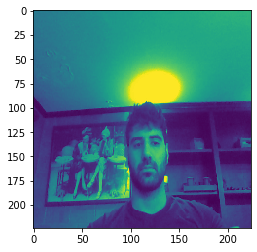

In [6]:
#####################################
## Open CV model Codename: "MALAK"
#####################################
##Capturing the video feed from the camera
video = cv2.VideoCapture(0)
##importing the frontal face model
model = cv2.CascadeClassifier("../model/haarcascade_frontalface_default.xml")
##reading from the video camera
check,frame = video.read()
##Searching for faces using the neural network
camera_face = model.detectMultiScale(frame,scaleFactor=1.05,minNeighbors=5)
if len(camera_face)>0:
    plt.imshow(frame)
##Switching off Video Camera and closinng any possible open windows
video.release()
cv2.destroyAllWindows
#######################################
## Tensorflow model Codename: "REVAN"
#######################################
##Create the keras model to be trained here (as of yet I am honestly unsure of what purpose this is going to serve)
keras_model = tf.keras
## Set all images to the shape below
IMG_SHAPE = (224, 224, 3)
# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,include_top=False,weights='imagenet')
##format the frame using the function specified
new_frame,new_label = format_example(frame,"Ahmad")
##Adding paddings to the image matrices
#new_frame = tf.pad(new_frame,[[160,160],[160,160]])
## Converting the image to grey scale
print(new_frame.shape)
## Displaying the image
plt.imshow(new_frame)
##Use the mobileNet CNN to extract the features from the frame
frame_feat= base_model(new_frame)
##